In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [2]:
image_path="train/TR02/Myo/4x-0275.jpg"
image = cv2.imread(image_path) 

In [3]:
image.shape

(1024, 1536, 3)

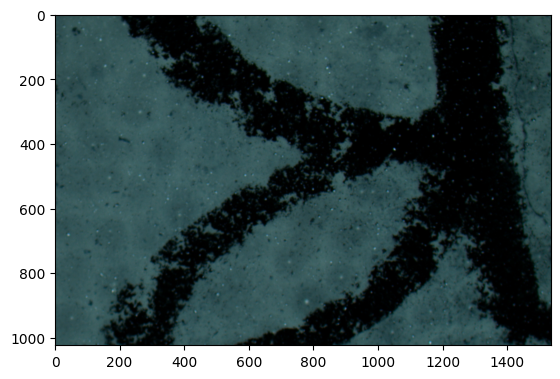

In [4]:
plt.imshow(image)

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
cv2.imwrite('xyz/gray.png', gray)

True

In [6]:
blurM = cv2.medianBlur(gray, 5) 
cv2.imwrite('xyz/blurM.png', blurM) 

True

In [7]:

blurG = cv2.GaussianBlur(gray, (9, 9), 0) 
cv2.imwrite('xyz/blurG.png', blurG) 

True

In [8]:
histoNorm = cv2.equalizeHist(gray) 
cv2.imwrite('xyz/histoNorm.png', histoNorm) 

True

In [9]:
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8)) 
claheNorm = clahe.apply(gray) 
cv2.imwrite('xyz/claheNorm.png', claheNorm) 

True

In [10]:
def pixelVal(pix, r1, s1, r2, s2): 
	if (0 <= pix and pix <= r1): 
		return (s1 / r1) * pix 
	elif (r1 < pix and pix <= r2): 
		return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1 
	else: 
		return ((255 - s2) / (255 - r2)) * (pix - r2) + s2 



r1 = 70
s1 = 0
r2 = 200
s2 = 255


In [11]:
pixelVal_vec = np.vectorize(pixelVal) 

contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2) 
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2) 

cv2.imwrite('xyz/contrast_stretch.png', contrast_stretched) 
cv2.imwrite('xyz/contrast_stretch_blurM.png', contrast_stretched_blurM) 

edge = cv2.Canny(gray, 100, 200) 
cv2.imwrite('xyz/edge.png', edge) 

edgeG = cv2.Canny(blurG, 100, 200) 
cv2.imwrite('xyz/edgeG.png', edgeG) 

edgeM = cv2.Canny(blurM, 100, 200) 
cv2.imwrite('xyz/edgeM.png', edgeM) 


True

In [12]:
kernel = np.ones((5, 5), np.uint8) 
dilation = cv2.dilate(gray, kernel, iterations = 1) 
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel) 

th2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2) 
th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2) 
ret4, th4 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
th5=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
th6=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)


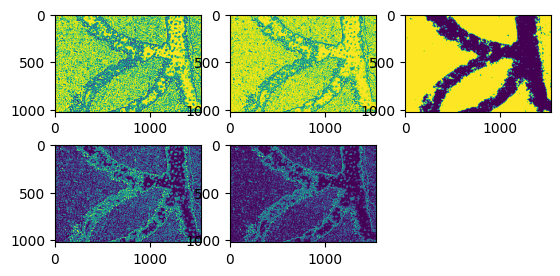

In [13]:
plt.subplot(3,3,1)
plt.imshow(th2)
plt.subplot(3,3,2)
plt.imshow(th3)
plt.subplot(3,3,3)
plt.imshow(th4)
plt.subplot(3,3,4)
plt.imshow(th5)
plt.subplot(3,3,5)
plt.imshow(th6)

In [14]:
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5,5), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on original image
result = image.copy()
cv2.drawContours(result, contours, -1, (0,255,0), 2)
count = len(contours)
print(count)
print(result)
print(contours)

7
[[[ 49  78  82]
  [ 48  79  82]
  [ 50  81  84]
  ...
  [ 40  74  74]
  [ 43  73  74]
  [ 44  74  75]]

 [[ 50  79  83]
  [ 48  79  82]
  [ 50  81  84]
  ...
  [ 42  73  74]
  [ 43  73  74]
  [ 43  73  74]]

 [[ 50  81  84]
  [ 50  81  84]
  [ 50  80  85]
  ...
  [ 42  73  72]
  [ 42  73  72]
  [ 43  74  73]]

 ...

 [[ 53  86  89]
  [ 52  85  88]
  [ 51  84  87]
  ...
  [ 26  40  39]
  [  0 255   0]
  [  0 255   0]]

 [[ 51  86  89]
  [ 51  86  89]
  [ 53  88  92]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[ 49  87  89]
  [ 49  87  89]
  [ 52  87  91]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]
(array([[[297, 754]],

       [[297, 765]],

       [[298, 765]],

       [[301, 768]],

       [[310, 768]],

       [[312, 766]],

       [[317, 766]],

       [[317, 765]],

       [[318, 764]],

       [[318, 756]],

       [[306, 756]],

       [[305, 755]],

       [[305, 754]]], dtype=int32), array([[[1531,  751]],

       [[1530,  752]],

       [[1529,  752

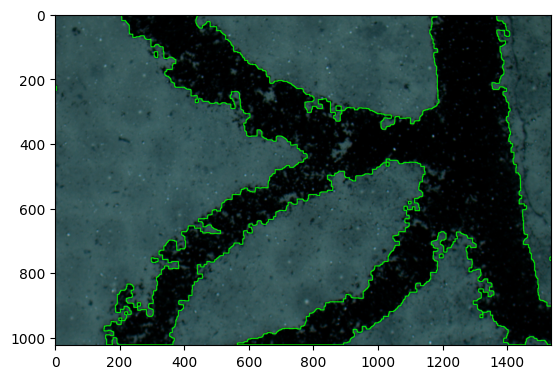

In [15]:
plt.imshow(result)

In [16]:
# Set our filtering parameters 
# Initialize parameter setting using cv2.SimpleBlobDetector 
params = cv2.SimpleBlobDetector_Params() 

# Set Area filtering parameters 
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters 
params.filterByCircularity = True
params.minCircularity = 0.1

# Set Convexity filtering parameters 
params.filterByConvexity = True
params.minConvexity = 0.2
	
# Set inertia filtering parameters 
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters 
detector = cv2.SimpleBlobDetector_create(params) 
	
# Detect blobs 
keypoints = detector.detect(image) 

# Draw blobs on our image as red circles 
blank = np.zeros((1, 1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255), 
						cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

number_of_blobs = len(keypoints) 
text = "Number of Circular Blobs: " + str(len(keypoints)) 
cv2.putText(blobs, text, (20, 550), 
			cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2) 

# Show blobs 
cv2.imshow("Filtering Circular Blobs Only", blobs) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


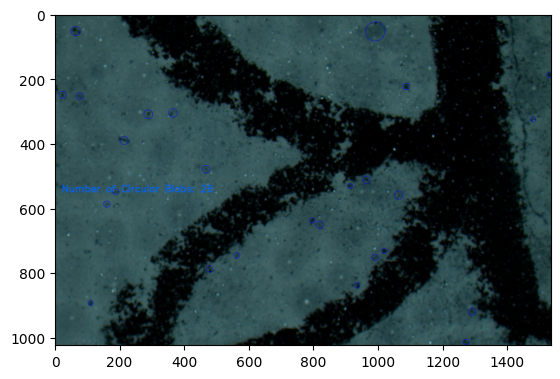

In [17]:
plt.imshow(blobs)

In [18]:
import numpy as np
import pandas as pd
import cv2

import scipy
import scipy.misc

import scipy.stats as stats
from scipy.stats import kurtosis

import skimage
from skimage import filters
from skimage import data, segmentation, color
#from skimage.future import graph
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.transform import rescale, resize, downscale_local_mean

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

C:\Users\JEET\AppData\Local\Temp\ipykernel_22524\1486425872.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
src = cv2.imread(image_path, 0)[:,10:1700]
print(src.shape)
#blur = skimage.filters.gaussian(src, sigma=0.09) # gaussian blur
src_denoised = filters.median(src,footprint=np.ones((5,5))) # median filter


(1024, 1526)


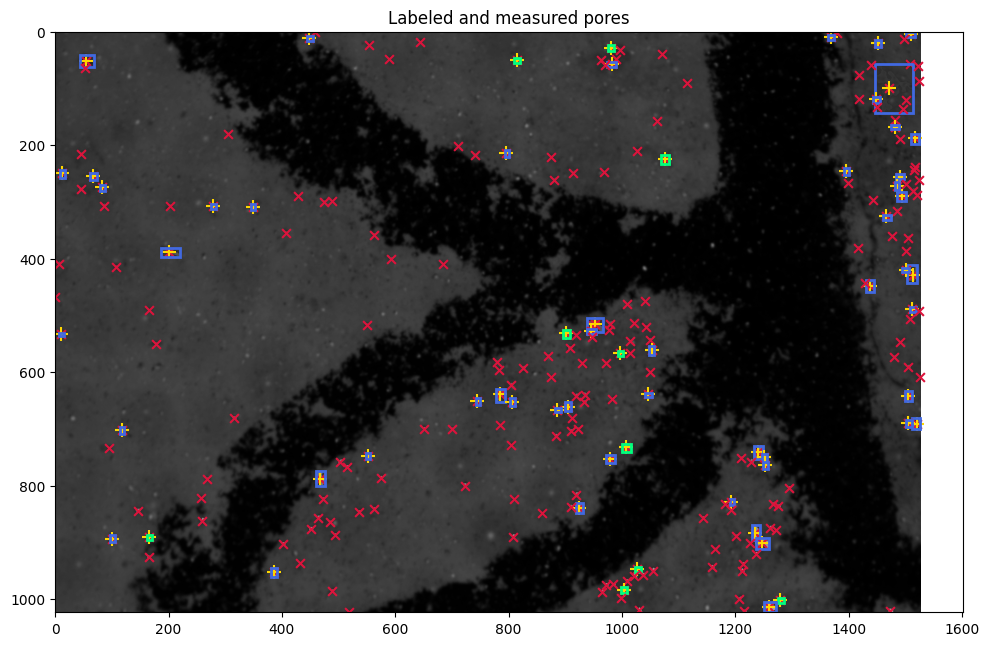

In [20]:
ret, thresh = cv2.threshold(src_denoised,60,255,cv2.THRESH_BINARY)
thresh = 255-thresh

label_image = label(thresh)
image_label_overlay = label2rgb(label_image, image=src)

MAX_AREA = 50000
MIN_AREA = 50

CRITICAL_ECCENTRICITY = 0.6

area_of_circular_pores = []
perimeter_of_circular_pores = []
equivalent_circular_diameter = []
eccentricity_of_circular_pores = []

number_of_circular_pores = 0
number_of_elliptical_pores = 0
total_number_of_pores = 0

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.imshow(src,cmap='gray')
ax.imshow(label_image,cmap='gray',alpha=0.5)

for region in regionprops(label_image):
    total_number_of_pores = total_number_of_pores + 1
    plt.scatter(region.centroid[1],region.centroid[0],marker='x',s=40,c='crimson')
    if (region.area <= MAX_AREA and region.area >= MIN_AREA):
        plt.scatter(region.centroid[1],region.centroid[0],marker='+',s=100,c='gold')
        minr, minc, maxr, maxc = region.bbox
        if(region.eccentricity < CRITICAL_ECCENTRICITY):
            rect = mpatches.Rectangle((minc,minr),maxc-minc,maxr-minr,fill=False, edgecolor='springgreen', linewidth=2)
            number_of_circular_pores = number_of_circular_pores + 1
            area_of_circular_pores.append(region.area)
            equivalent_circular_diameter.append(region.equivalent_diameter)
            perimeter_of_circular_pores.append(region.perimeter)
            eccentricity_of_circular_pores.append(region.eccentricity)

        else:
            rect = mpatches.Rectangle((minc,minr),maxc-minc,maxr-minr,
                                  fill=False, edgecolor='royalblue', linewidth=2)
            number_of_elliptical_pores = number_of_elliptical_pores + 1
        ax.add_patch(rect)
ax.set_title('Labeled and measured pores')

plt.tight_layout()
plt.show()

In [21]:
print("\nNumber of circular pores = {}".format(number_of_circular_pores))
print("Number of elliptical pores = {}".format(number_of_elliptical_pores))
number_of_ignored_pores = total_number_of_pores-(number_of_elliptical_pores+number_of_circular_pores)
print("Number of ignored pores = {}".format(number_of_ignored_pores))
print("\nTotal number of pores = {}".format(total_number_of_pores))


Number of circular pores = 10
Number of elliptical pores = 53
Number of ignored pores = 160

Total number of pores = 223


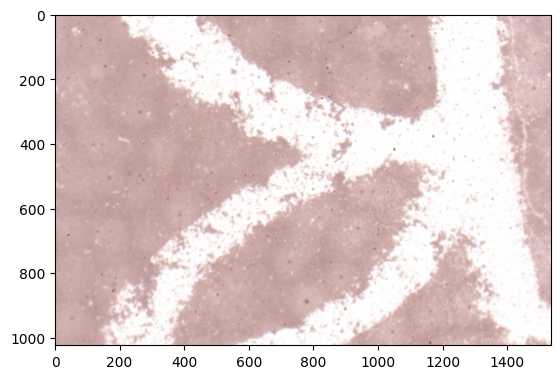

In [22]:
imagem = cv2.bitwise_not(image)
plt.imshow(imagem)

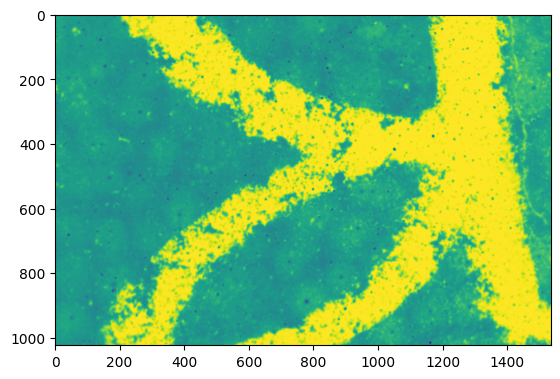

In [23]:
imagen=cv2.bitwise_not(gray)
plt.imshow(imagen)